In [47]:
import pandas as pd
import os
import ast

import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [48]:
def load(filepath):

    filename = os.path.basename(filepath)

    if 'features' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'echonest' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'genres' in filename:
        return pd.read_csv(filepath, index_col=0)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all'),
                   ('track', 'genres_top')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                'category', categories=SUBSETS, ordered=True)

        COLUMNS = [('track', 'license'), ('artist', 'bio'),
                   ('album', 'type'), ('album', 'information')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks

In [49]:
# Directory where mp3 are stored.
filepath = 'audio_files/tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                             ...              track                         \
         producer tags       ...        information interest language_code   
track_id                     ...                                             
2             NaN   []       ...                NaN     4656            en   
3             NaN   []       ...                NaN     1470            en   
5             NaN   []       ...                NaN     1933            en   
10            NaN   []       ...                NaN    54881            en   
20            NaN   []       ...                NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [50]:
list(tracks)

[('album', 'comments'),
 ('album', 'date_created'),
 ('album', 'date_released'),
 ('album', 'engineer'),
 ('album', 'favorites'),
 ('album', 'id'),
 ('album', 'information'),
 ('album', 'listens'),
 ('album', 'producer'),
 ('album', 'tags'),
 ('album', 'title'),
 ('album', 'tracks'),
 ('album', 'type'),
 ('artist', 'active_year_begin'),
 ('artist', 'active_year_end'),
 ('artist', 'associated_labels'),
 ('artist', 'bio'),
 ('artist', 'comments'),
 ('artist', 'date_created'),
 ('artist', 'favorites'),
 ('artist', 'id'),
 ('artist', 'latitude'),
 ('artist', 'location'),
 ('artist', 'longitude'),
 ('artist', 'members'),
 ('artist', 'name'),
 ('artist', 'related_projects'),
 ('artist', 'tags'),
 ('artist', 'website'),
 ('artist', 'wikipedia_page'),
 ('set', 'split'),
 ('set', 'subset'),
 ('track', 'bit_rate'),
 ('track', 'comments'),
 ('track', 'composer'),
 ('track', 'date_created'),
 ('track', 'date_recorded'),
 ('track', 'duration'),
 ('track', 'favorites'),
 ('track', 'genre_top'),
 ('t

In [51]:
keep_cols = [('set', 'split'),
('set', 'subset'),('track', 'genre_top'), ('track', 'genres')]

df_all = tracks[keep_cols]
df_all = df_all[df_all[('set', 'subset')] == 'small']
df_all.head()

set            track       
             split subset genre_top genres
track_id                                  
2         training  small   Hip-Hop   [21]
5         training  small   Hip-Hop   [21]
10        training  small       Pop   [10]
140       training  small      Folk   [17]
141       training  small      Folk   [17]

In [52]:
df_all.shape

(8000, 4)

In [53]:
df_all[('track', 'genre_top')].value_counts()

Instrumental     1000
Electronic       1000
Experimental     1000
Folk             1000
Rock             1000
Pop              1000
Hip-Hop          1000
International    1000
Name: (track, genre_top), dtype: int64

In [54]:
df_all[('set', 'split')].value_counts()

training      6400
test           800
validation     800
Name: (set, split), dtype: int64

In [55]:
filepath = 'baseline_model/features.csv'
features = pd.read_csv(filepath, index_col=0,header=[0, 1, 2], skip_blank_lines=True )

In [56]:
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                               ...      tonnetz  \
statistics                                            ...          std   
number            07        08        09        10    ...           04   
track_id                                              ...                
2           1.481593  2.691455  0.866868  1.341231    ...     0.054125   
3           1.366848  1.054094  0.108103  0.619185    ...     0.063831   
5          -0.923192 -0.927232  0.666617  1.038546    ...     0.040730   
10          1.770694  1.604566  0.521217  1.982386    ...     0.074358   
20         -0.289294 -0.816410  0.043851 -0.804761    ...     0.095003   

feature                               zcr                                \
statistics                       kurtosis       max      mean    median   
number            05        06         01        01        01        01   
track_id                                                                  
2           0.012226  0.012111   5.758890  0.459473  0.085629  0.071289   
3           0.014212  0.017740   2.824694  0.466309  0.084578  0.063965   
5           0.012691  0.014759   6.808415  0.375000  0.053114  0.041504   
10          0.017952  0.013921  21.434212  0.452148  0.077515  0.071777   
20          0.022492  0.021355  16.669037  0.469727  0.047225  0.040039   

feature                                   
statistics       min      skew       std  
number            01        01        01  
track_id                                  
2           0.000000  2.089872  0.061448  
3           0.000000  1.716724  0.069330  
5           0.000000  2.193303  0.044861  
10          0.000000  3.542325  0.040800  
20          0.000977  3.189831  0.030993  

[5 rows x 518 columns]

In [57]:
mfcc = features['mfcc']
mfcc.head()

statistics   kurtosis                                                    \
number             01        02        03        04        05        06   
track_id                                                                  
2            3.856789  1.541901  0.000816  0.330728  0.118731 -0.342687   
3            4.296755  1.399977  0.112535 -0.211170  0.032953 -0.023489   
5            2.624517  2.415293  0.440233 -0.782131 -0.771069 -0.724216   
10           5.076893  1.161854  2.095651  1.372743 -0.203574 -0.345354   
20          11.880132  4.085320  0.002655  1.518562  0.181947  0.339014   

statistics                                            ...           std  \
number            07        08        09        10    ...            11   
track_id                                              ...                 
2          -0.259252  0.146735  0.410656 -0.162872    ...     10.059609   
3           0.150404  0.046454  0.033484 -0.064596    ...      8.771966   
5           0.090260  0.152119  0.261731 -0.608905    ...      8.863638   
10         -0.529139  0.561974  0.281350 -0.150672    ...      8.289734   
20          0.367611  0.069932 -0.016032  0.026012    ...      7.706648   

statistics                                                               \
number             12        13        14        15        16        17   
track_id                                                                  
2            8.601942  9.284250  9.245516  8.520863  8.560472  7.651871   
3           10.026867  6.978541  7.650417  9.600357  7.222888  8.398293   
5            9.581952  8.895723  8.141456  8.201844  7.780963  7.132692   
10           7.985110  7.075400  6.972649  7.071393  7.270959  7.051070   
20           6.498904  6.845514  6.934421  7.019398  6.983841  6.813648   

statistics                                
number            18        19        20  
track_id                                  
2           7.246555  7.077188  7.391859  
3           7.285423  7.417791  8.777440  
5           7.539753  8.452527  7.334442  
10          6.928591  6.430473  6.186294  
20          7.520811  7.098001  7.032246  

[5 rows x 140 columns]

In [58]:
mfcc.shape

(106574, 140)

(106574,) (106574,) (106574,)


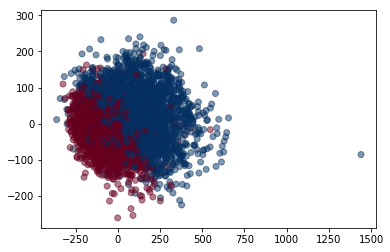

((5631, 2), (5631,))

In [59]:
small = tracks['set', 'subset'] <= 'small'
genre1 = tracks['track', 'genre_top'] == 'Instrumental'
genre2 = tracks['track', 'genre_top'] == 'Hip-Hop'

print(small.shape, genre1.shape, genre2.shape)

X = features.loc[small & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[small & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5)
plt.show()
X.shape, y.shape

In [60]:
genre2.head()

track_id
2      True
3      True
5      True
10    False
20    False
Name: (track, genre_top), dtype: bool